<a href="https://colab.research.google.com/github/dexter11235813/EVA_5/blob/main/assignment_8/assignment_8_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from os.path import join

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
%pwd

'/content/drive/My Drive/EVA5/EVA_5/assignment_8'

In [24]:
!ls

assignment_8_nb.ipynb  dataloader.py  __pycache__		 transforms.py
config.py	       images	      run.py
data		       model.py       show_images_from_batch.py


## MAIN CODE

In [1]:
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import dataloader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import OneCycleLR
import show_images_from_batch
importlib.reload(model)
importlib.reload(config)
importlib.reload(dataloader)
importlib.reload(show_images_from_batch)

import warnings
warnings.filterwarnings('ignore')

In [2]:
net = model.ResNet18().to(config.DEVICE)
criterion = nn.CrossEntropyLoss()#torch.nn.functional.nll_loss
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
train_loader, test_loader = dataloader.get_iterators()

In [ ]:
summary(net, (3, 32, 32))


In [ ]:
show_images_from_batch.get_images(train_loader)


In [19]:

first_run = model.Trial(
    name="first_run",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "device": config.DEVICE,
        "loss_fn": criterion,
        "scheduler": scheduler
    },
)

first_run.run()
print("Done!")

  0%|          | 1/782 [00:00<02:22,  5.49it/s]

1 / 20


  3%|▎         | 4/157 [00:00<00:04, 33.93it/s]

 Training loss = 0.02104436792433262, Training Accuracy : 51.468


  0%|          | 1/782 [00:00<01:43,  7.51it/s]

 Test loss = 0.9579312722206116, Test Accuracy : 66.36
2 / 20


  3%|▎         | 4/157 [00:00<00:04, 38.12it/s]

 Training loss = 0.01522175781428814, Training Accuracy : 66.504


  0%|          | 1/782 [00:00<01:39,  7.82it/s]

 Test loss = 0.7728026418685913, Test Accuracy : 73.83
3 / 20


  3%|▎         | 4/157 [00:00<00:03, 38.31it/s]

 Training loss = 0.012013023719191551, Training Accuracy : 73.85


  0%|          | 1/782 [00:00<01:37,  8.00it/s]

 Test loss = 0.8193589548110962, Test Accuracy : 72.62
4 / 20


  3%|▎         | 4/157 [00:00<00:04, 37.30it/s]

 Training loss = 0.00939088873565197, Training Accuracy : 79.404


  0%|          | 1/782 [00:00<01:37,  8.01it/s]

 Test loss = 0.6986748643398285, Test Accuracy : 76.77
5 / 20


  3%|▎         | 4/157 [00:00<00:04, 37.40it/s]

 Training loss = 0.00758147519081831, Training Accuracy : 83.296


  0%|          | 1/782 [00:00<01:38,  7.92it/s]

 Test loss = 0.49392020478248594, Test Accuracy : 83.23
6 / 20


  3%|▎         | 4/157 [00:00<00:04, 34.66it/s]

 Training loss = 0.0063461135141551495, Training Accuracy : 86.16


  0%|          | 1/782 [00:00<01:46,  7.32it/s]

 Test loss = 0.5170641703128814, Test Accuracy : 82.77
7 / 20


  3%|▎         | 4/157 [00:00<00:04, 37.74it/s]

 Training loss = 0.0051800855435431, Training Accuracy : 88.61


  0%|          | 1/782 [00:00<01:47,  7.29it/s]

 Test loss = 0.5103466168880463, Test Accuracy : 83.08
8 / 20


  3%|▎         | 4/157 [00:00<00:04, 33.96it/s]

 Training loss = 0.004366494249552488, Training Accuracy : 90.362


  0%|          | 1/782 [00:00<01:37,  7.99it/s]

 Test loss = 0.48172497305870055, Test Accuracy : 84.44
9 / 20


  3%|▎         | 4/157 [00:00<00:04, 38.15it/s]

 Training loss = 0.003652523970231414, Training Accuracy : 91.97


  0%|          | 1/782 [00:00<01:46,  7.34it/s]

 Test loss = 0.48431796422004697, Test Accuracy : 84.97
10 / 20


  3%|▎         | 4/157 [00:00<00:04, 38.00it/s]

 Training loss = 0.0029689513612538576, Training Accuracy : 93.568


  0%|          | 1/782 [00:00<01:50,  7.06it/s]

 Test loss = 0.48929127616882323, Test Accuracy : 85.34
11 / 20


  3%|▎         | 4/157 [00:00<00:04, 33.68it/s]

 Training loss = 0.0023734301794320345, Training Accuracy : 94.794


  0%|          | 1/782 [00:00<01:39,  7.88it/s]

 Test loss = 0.454189829826355, Test Accuracy : 86.69
12 / 20


  3%|▎         | 4/157 [00:00<00:04, 37.38it/s]

 Training loss = 0.0018663684604689479, Training Accuracy : 95.92


  0%|          | 1/782 [00:00<01:39,  7.88it/s]

 Test loss = 0.4559980827331543, Test Accuracy : 87.15
13 / 20


  3%|▎         | 4/157 [00:00<00:04, 32.43it/s]

 Training loss = 0.0014946472365409136, Training Accuracy : 96.694


  0%|          | 1/782 [00:00<01:48,  7.19it/s]

 Test loss = 0.4848557709217072, Test Accuracy : 87.36
14 / 20


  3%|▎         | 4/157 [00:00<00:04, 35.94it/s]

 Training loss = 0.0010131753515452147, Training Accuracy : 97.828


  0%|          | 1/782 [00:00<01:40,  7.78it/s]

 Test loss = 0.4508515143871307, Test Accuracy : 88.18
15 / 20


  3%|▎         | 4/157 [00:00<00:04, 36.73it/s]

 Training loss = 0.000669208646286279, Training Accuracy : 98.59


  0%|          | 1/782 [00:00<01:46,  7.35it/s]

 Test loss = 0.5016263261318207, Test Accuracy : 87.86
16 / 20


  3%|▎         | 4/157 [00:00<00:04, 34.18it/s]

 Training loss = 0.00040042714681476355, Training Accuracy : 99.224


  0%|          | 1/782 [00:00<01:38,  7.90it/s]

 Test loss = 0.47793337631225585, Test Accuracy : 88.64
17 / 20


  3%|▎         | 4/157 [00:00<00:04, 36.27it/s]

 Training loss = 0.0002127785119228065, Training Accuracy : 99.582


  0%|          | 1/782 [00:00<01:46,  7.32it/s]

 Test loss = 0.49054302978515624, Test Accuracy : 89.16
18 / 20


  3%|▎         | 4/157 [00:00<00:03, 38.42it/s]

 Training loss = 0.0001295374968321994, Training Accuracy : 99.808


  0%|          | 1/782 [00:00<01:38,  7.89it/s]

 Test loss = 0.4849599668979645, Test Accuracy : 89.37
19 / 20


  3%|▎         | 4/157 [00:00<00:04, 36.10it/s]

 Training loss = 9.461209992878139e-05, Training Accuracy : 99.84


  0%|          | 1/782 [00:00<01:57,  6.67it/s]

 Test loss = 0.48257704219818115, Test Accuracy : 89.55
20 / 20


  3%|▎         | 4/157 [00:00<00:04, 36.95it/s]

 Training loss = 7.717860717093572e-05, Training Accuracy : 99.902


100%|██████████| 157/157 [00:04<00:00, 37.04it/s]

 Test loss = 0.48242829642295837, Test Accuracy : 89.48
Done!


100%|██████████| 157/157 [00:04<00:00, 36.40it/s]


plot saved at ./images/correctly_classified_images.png


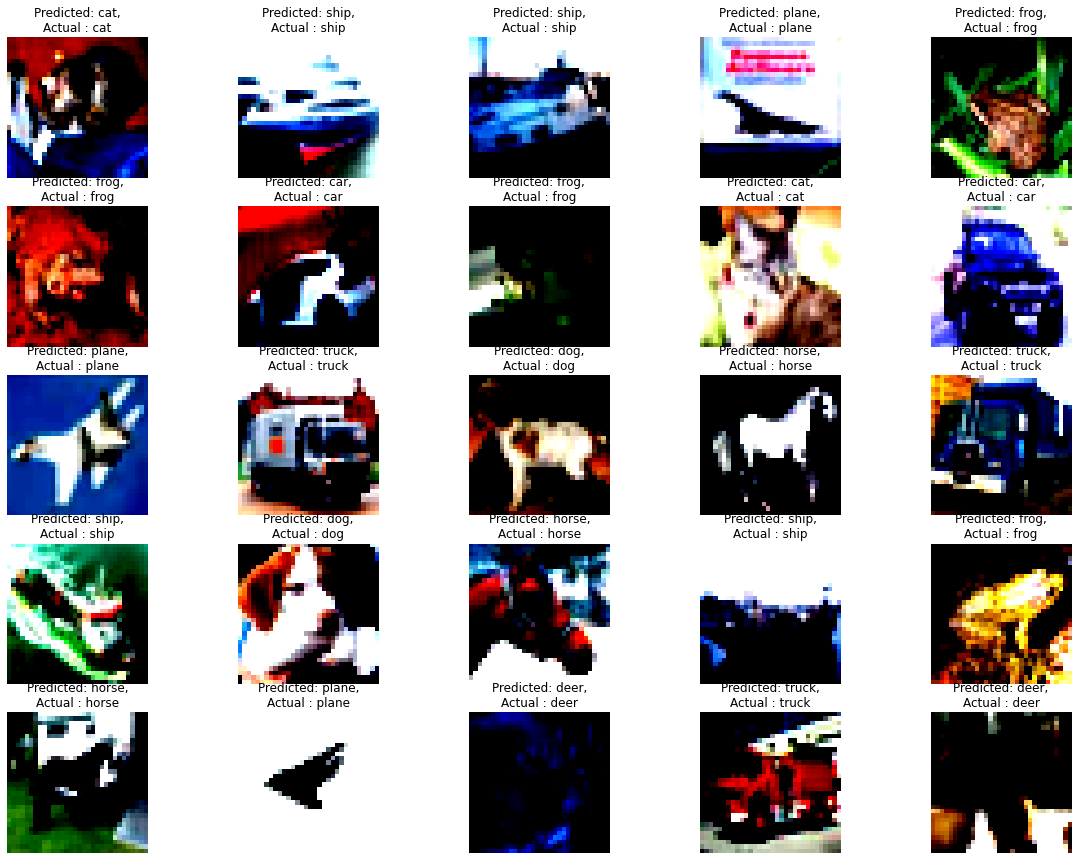

In [20]:
show_images_from_batch.plot_images_by_classification(25, first_run.model, test_loader, config.DEVICE, misclassified=False)


100%|██████████| 157/157 [00:04<00:00, 36.72it/s]


plot saved at ./images/misclassified_images.png


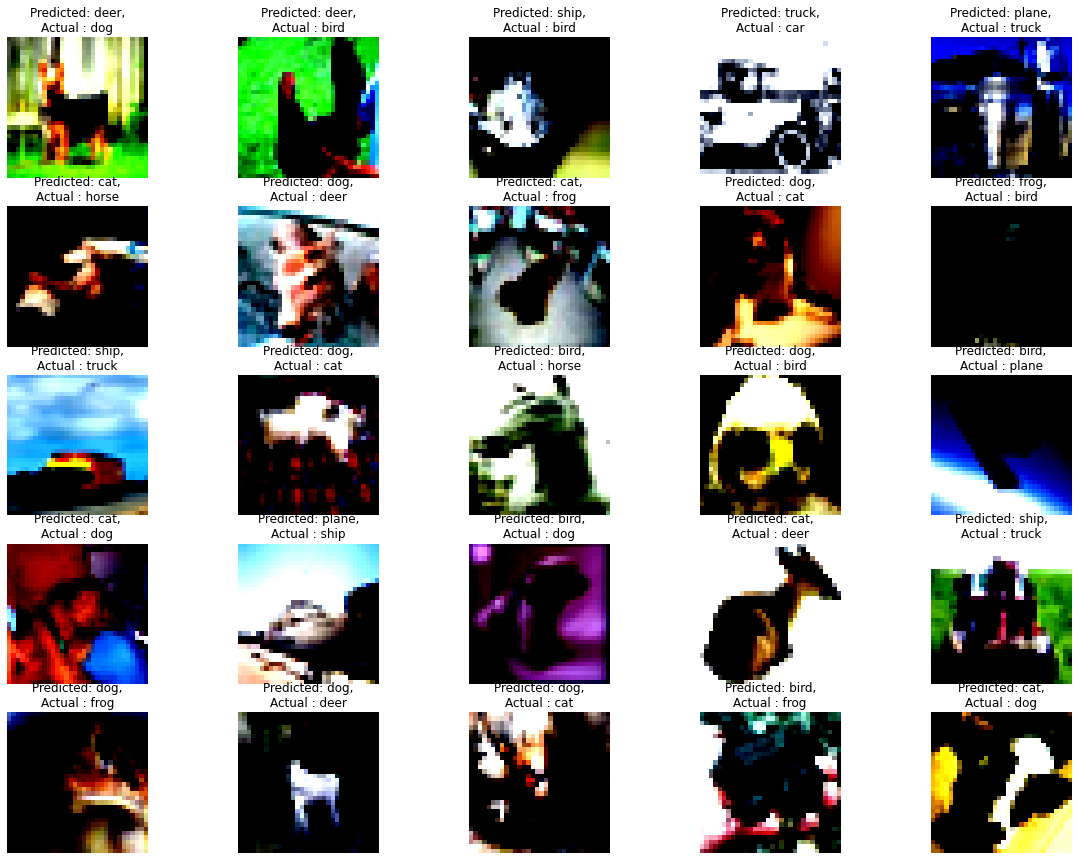

In [21]:
show_images_from_batch.plot_images_by_classification(25, first_run.model, test_loader, config.DEVICE)


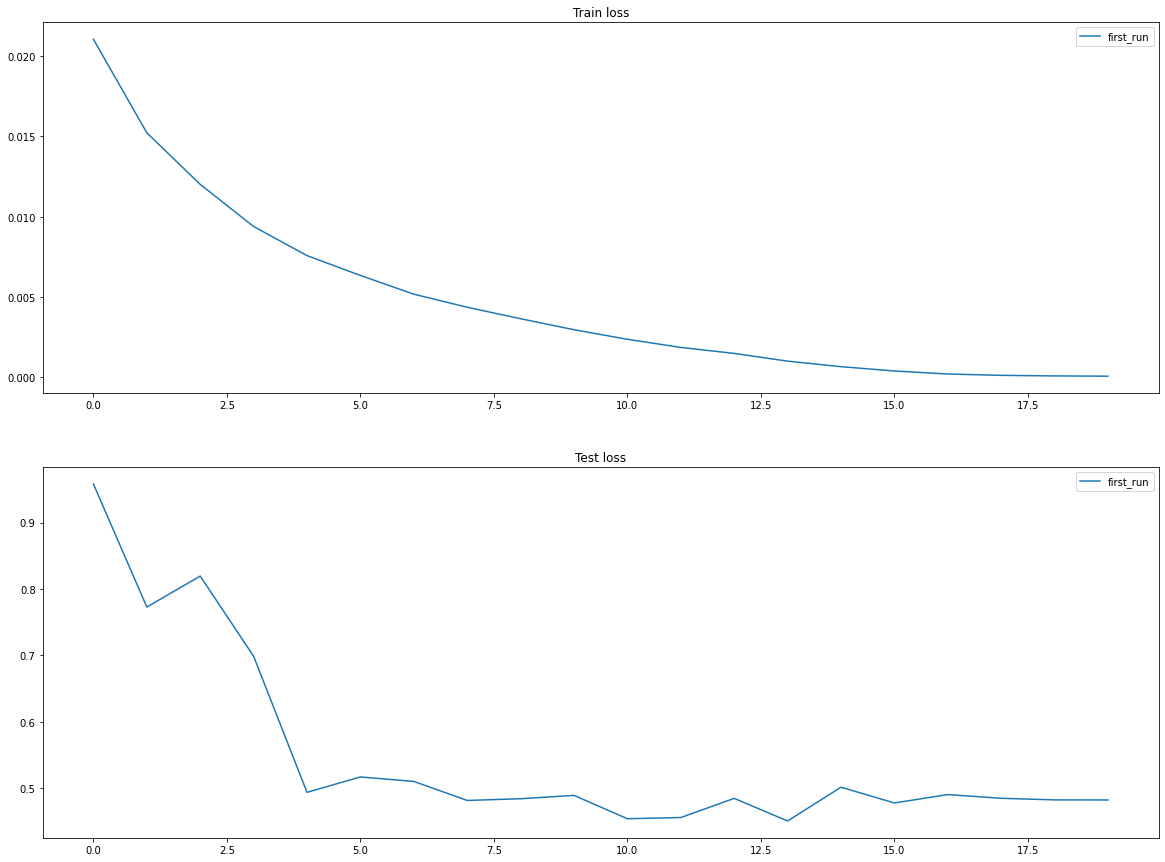

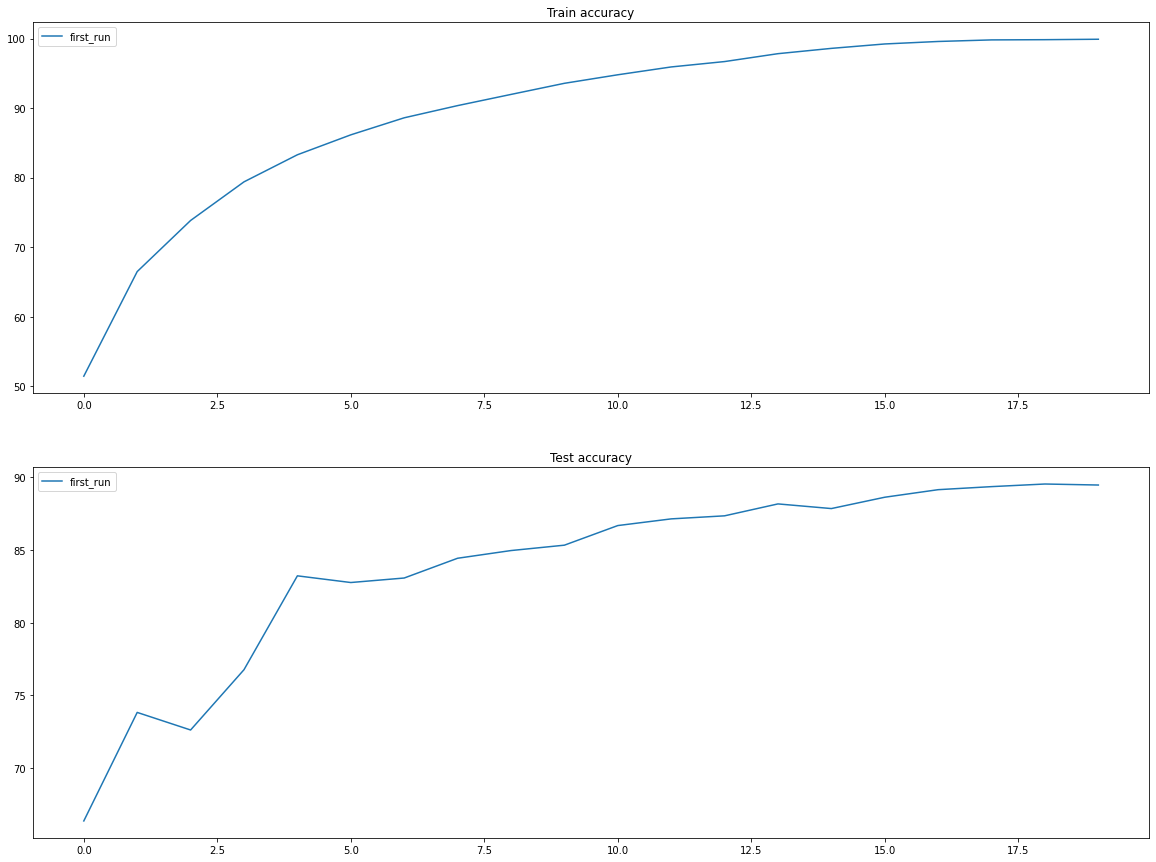

In [22]:
show_images_from_batch.plot_curves_for_trials(first_run)